In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop=pd.read_csv("Crop Production data.csv")
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


What is the total number of records in the dataset?

In [3]:
total_records = len(crop)

print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 246091


What is the range of crop years covered in the dataset?



In [4]:
min_year = crop['Crop_Year'].min()
max_year = crop['Crop_Year'].max()

print("Range of crop years covered in the dataset:", min_year, "-", max_year)


Range of crop years covered in the dataset: 1997 - 2015


How many unique districts are there in the dataset?

In [5]:
unique_districts = crop['District_Name'].nunique()

print("Number of unique districts in the dataset:", unique_districts)

Number of unique districts in the dataset: 646


Which season has the highest number of entries in the dataset?

In [6]:
season_counts = crop['Season'].value_counts()

# Get the season with the highest number of entries
highest_season = season_counts.idxmax()

print("Season with the highest number of entries:", highest_season)

Season with the highest number of entries: Kharif     


Is there any correlation between the area and production of crops? If so, what is the strength of the correlation?


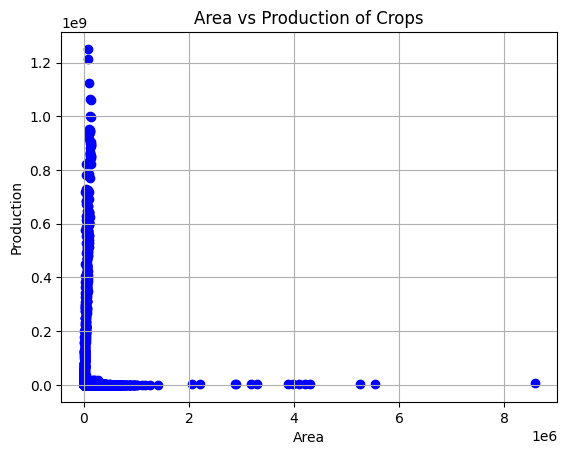

Correlation Coefficient: 4.058747919933994


In [7]:
correlation_coefficient = crop['Area'].corr(crop['Production'])
plt.scatter(crop['Area'], crop['Production'], color='blue')
plt.title('Area vs Production of Crops')
plt.xlabel('Area')
plt.ylabel('Production')
plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation_coefficient*100)

Which state has the highest production of Rice?

State with the highest production of Rice: Kerala
Production of Rice in that state: 97880045375.7


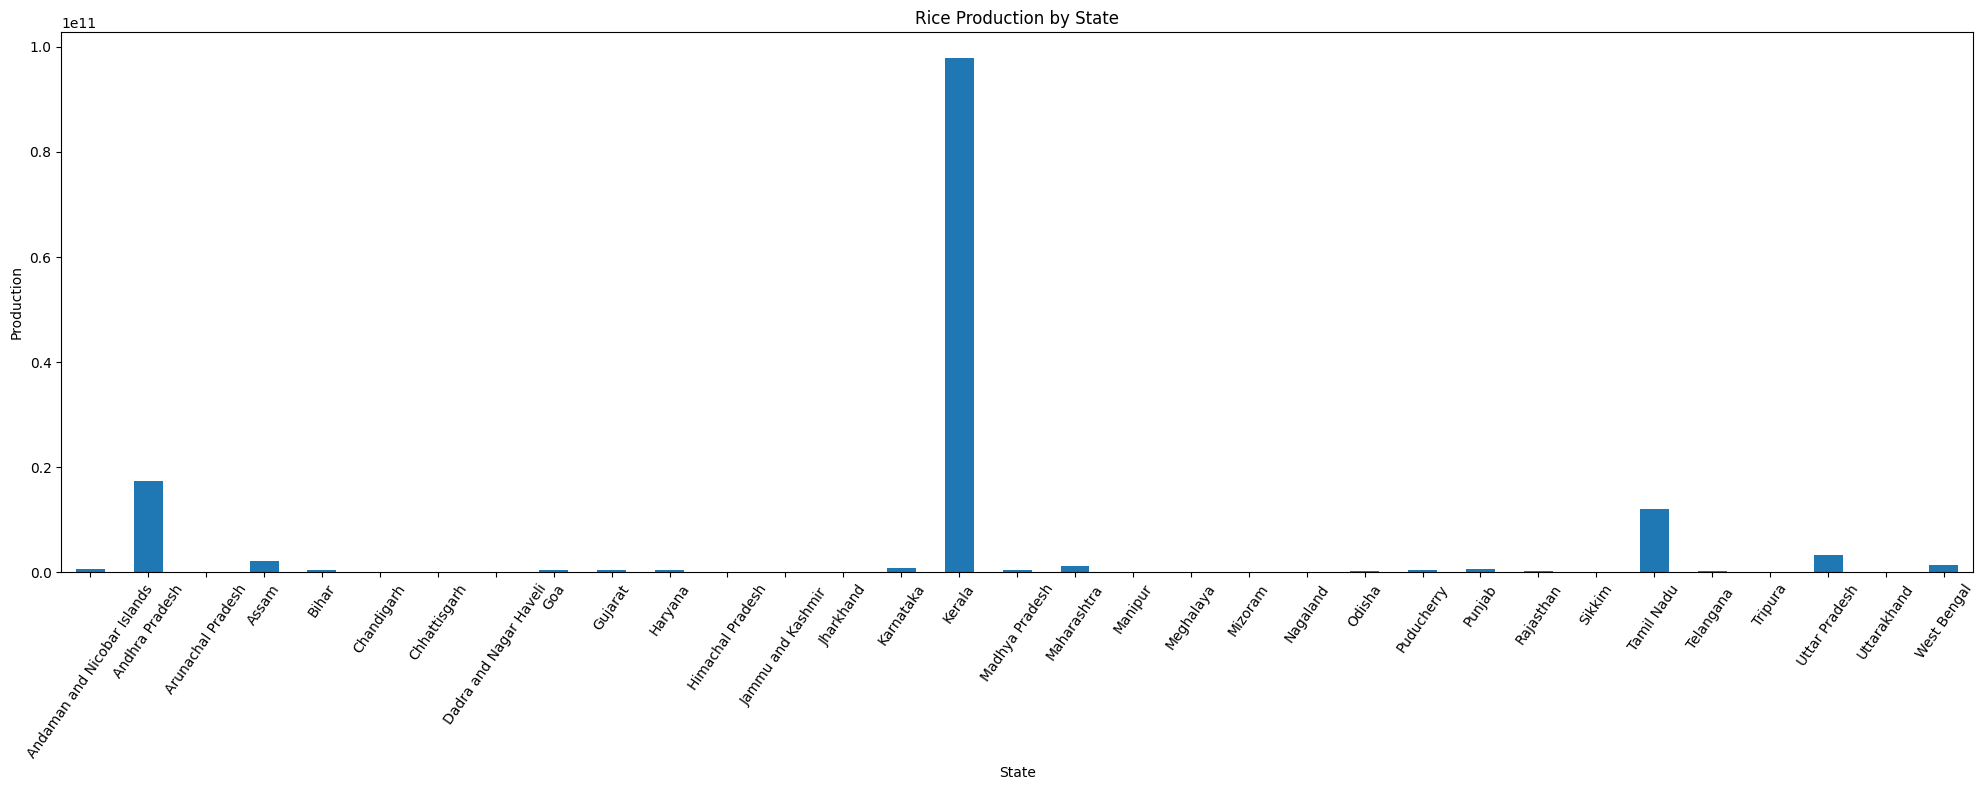

In [8]:
state_production = crop.groupby('State_Name')['Production'].sum()

# Find the state with the highest production
highest_production_state = state_production.idxmax()
highest_production = state_production.max()

# Print the result
print("State with the highest production of Rice:", highest_production_state)
print("Production of Rice in that state:", highest_production)

# Plot the data
state_production.plot(kind='bar', figsize=(20, 8))
plt.title('Rice Production by State')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

Which crop has the highest area under cultivation?


In [9]:
crop_areas = crop.groupby('Crop')['Area'].sum()

# Find the crop with the highest area under cultivation
max_area_crop = crop_areas.idxmax()
max_area = crop_areas.max()

print(f"The crop with the highest area under cultivation is '{max_area_crop}' with an area of {max_area} acres.")

The crop with the highest area under cultivation is 'Rice' with an area of 747125281.3 acres.


Which crop has the lowest area under cultivation?

In [10]:
crop_areas = crop.groupby('Crop')['Area'].sum()

# Find the crop with the lowest area under cultivation
min_area_crop = crop_areas.idxmin()
min_area = crop_areas.min()

print(f"The crop with the lowest area under cultivation is '{min_area_crop}' with an area of {min_area} acres.")

The crop with the lowest area under cultivation is 'Other Dry Fruit' with an area of 7.0 acres.


What is the total production of all crops in the dataset?

In [11]:
total_production = crop['Production'].sum()

print("Total production of all crops:", total_production)

Total production of all crops: 141176116767.38995


How many unique crop types are there in the dataset?

In [12]:
unique_crop_types = crop['Crop'].nunique()

print("Number of unique crop types:", unique_crop_types)

Number of unique crop types: 124


Which season witnesses the highest average production across all crops?

In [13]:
season_crop_production = crop.groupby(['Season', 'Crop'])['Production'].sum().reset_index()

# Calculate the average production for each season
season_avg_production = season_crop_production.groupby('Season')['Production'].mean().reset_index()

# Find the season with the highest average production across all crops
highest_avg_season = season_avg_production.loc[season_avg_production['Production'].idxmax()]

print("The season with the highest average production across all crops is:", highest_avg_season['Season'])

The season with the highest average production across all crops is: Whole Year 


Which district has the highest production of Banana?


In [14]:
district_production = crop.groupby('District_Name')['Production'].sum()

# Sort the districts by banana production in descending order and get the top 5
top_5_districts = district_production.sort_values(ascending=False).head(5)

print("Top 5 districts with the highest banana production:")
print(top_5_districts)

Top 5 districts with the highest banana production:
District_Name
KOZHIKODE             1.528074e+10
MALAPPURAM            1.451840e+10
THIRUVANANTHAPURAM    1.002271e+10
THRISSUR              9.923508e+09
KANNUR                9.783432e+09
Name: Production, dtype: float64


Which district has the Lowest production of Banana?


In [15]:
district_production = crop.groupby('District_Name')['Production'].sum()

# Sort the districts by banana production in descending order and get the top 5
lowest = district_production.sort_values(ascending=True).head(5)

print("Top 5 districts with the Lowest banana production:")
print(lowest)

Top 5 districts with the Lowest banana production:
District_Name
MUMBAI          2.0
NAMSAI        794.0
HYDERABAD    3835.0
KHUNTI       5024.0
RAMGARH      5472.0
Name: Production, dtype: float64


Which crop has the highest production-to-area ratio?

In [16]:
crop['Production_to_Area_Ratio'] = crop['Production'] / crop['Area']

# Find the crop with the highest production-to-area ratio
max_ratio_crop = crop.loc[crop['Production_to_Area_Ratio'].idxmax()]

# Print the result
print("Crop with the highest production-to-area ratio:", max_ratio_crop['Crop'])
print("Production-to-area ratio:", max_ratio_crop['Production_to_Area_Ratio'])

Crop with the highest production-to-area ratio: Sugarcane
Production-to-area ratio: 88000.0


Which crop has the lowest production-to-area ratio?

In [17]:
crop['Production_to_Area_Ratio'] = crop['Production'] / crop['Area']

# Find the crop with the highest production-to-area ratio
min_ratio_crop = crop.loc[crop['Production_to_Area_Ratio'].idxmin()]

# Print the result
print("Crop with the lowest production-to-area ratio:", min_ratio_crop['Crop'])
print("Production-to-area ratio:", min_ratio_crop['Production_to_Area_Ratio'])

Crop with the lowest production-to-area ratio: Soyabean
Production-to-area ratio: 0.0


What is the average production per unit area for each crop?

In [18]:
average_production_per_area = crop.groupby('Crop').apply(lambda x: (x['Production'] / x['Area']).mean())

print("Average production per unit area for each crop:")
#print(average_production_per_area)
average_production_per_area.head(15)

Average production per unit area for each crop:


Crop
Apple                         0.000000
Arcanut (Processed)           1.284838
Arecanut                      2.163932
Arhar/Tur                     0.797443
Ash Gourd                     0.000000
Atcanut (Raw)                 6.216616
Bajra                         1.173872
Banana                       27.064755
Barley                        1.822868
Bean                          1.340000
Beans & Mutter(Vegetable)     3.116407
Beet Root                     0.000000
Ber                           0.000000
Bhindi                        2.999251
Bitter Gourd                  0.634945
dtype: float64

 Distribution of crop production across different states?

c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunc

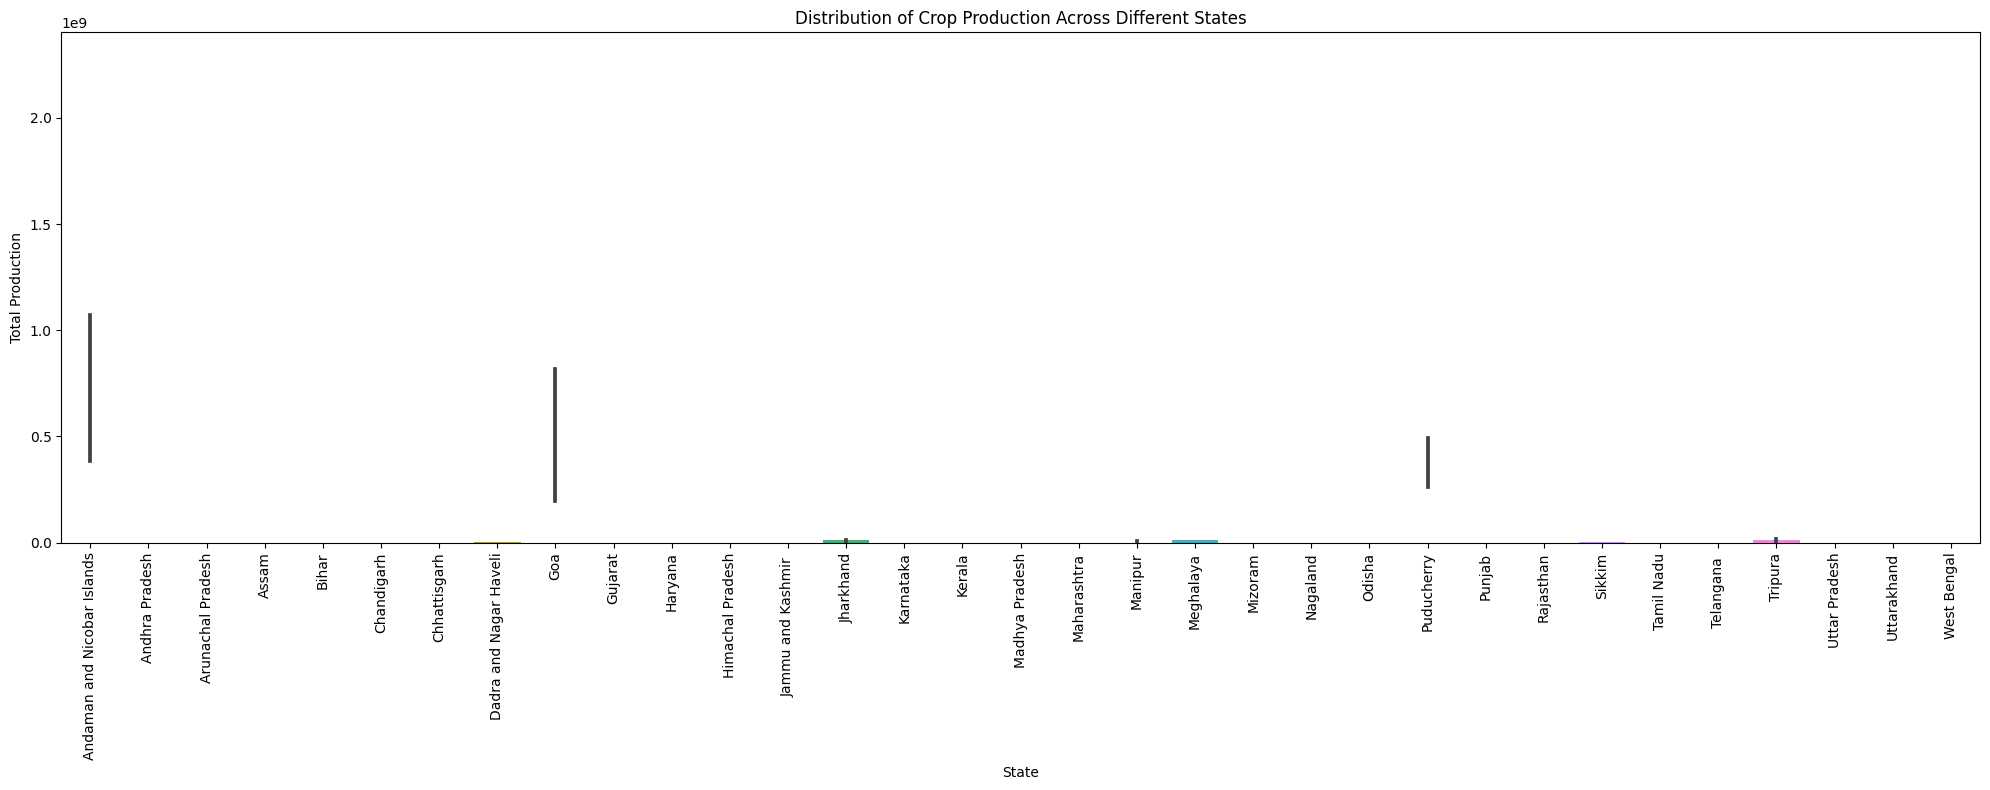

In [19]:
plt.figure(figsize=(20, 8))
sns.barplot(x='State_Name', y='Production', data=crop, estimator=sum)
plt.title('Distribution of Crop Production Across Different States')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

How does the production of major crops vary over different seasons by selecting only 5 crop from overall dataset

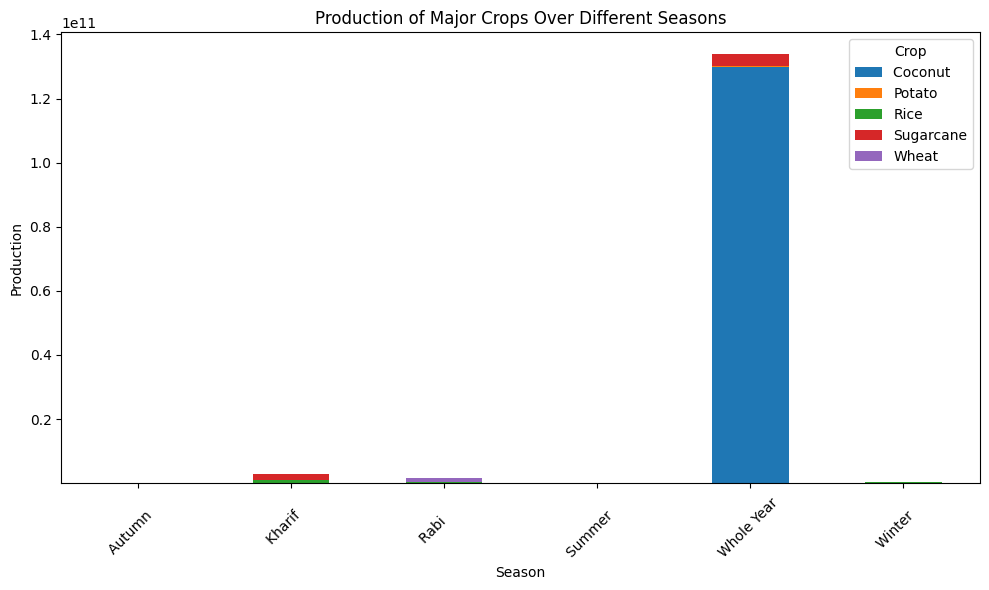

In [20]:
top_crops = crop.groupby('Crop')['Production'].sum().nlargest(5).index

# Filter the dataset to include only the top 10 crops
data_top10 = crop[crop['Crop'].isin(top_crops)]

# Group the data by season and crop, and calculate the total production
seasonal_production = data_top10.groupby(['Season', 'Crop'])['Production'].sum().unstack()

# Plotting
seasonal_production.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Production of Major Crops Over Different Seasons')
plt.xlabel('Season')
plt.ylabel('Production')
plt.legend(title='Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

heatmap to show the production of top 10 crops across states and years.

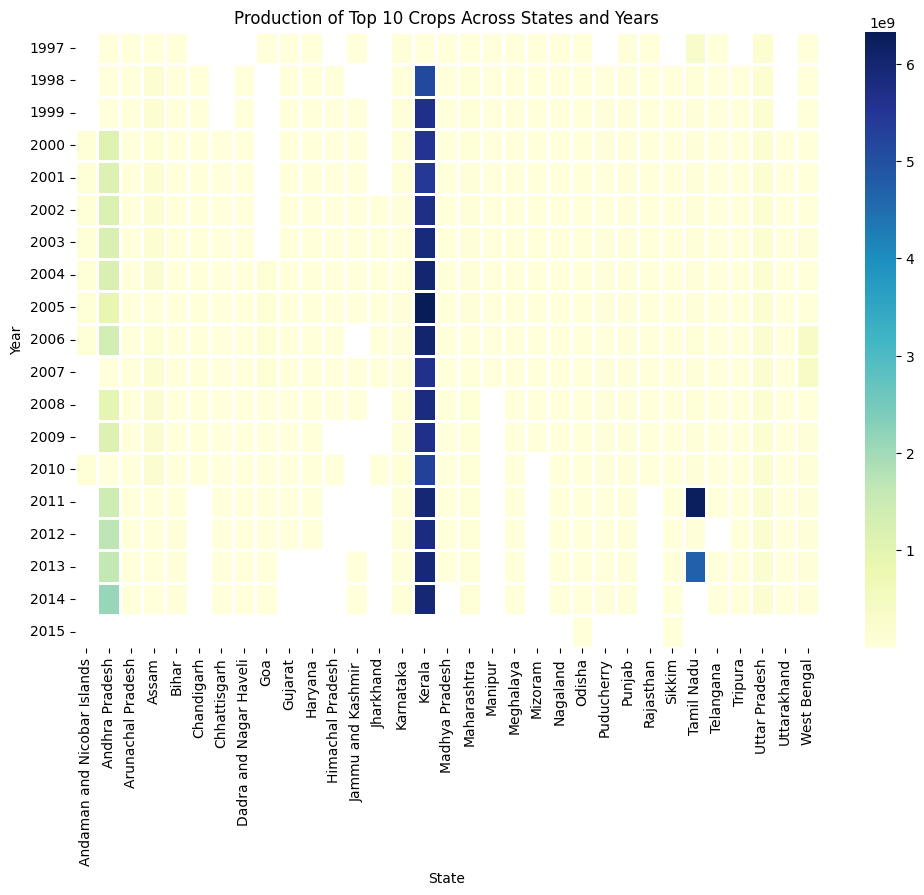

In [21]:
top_10_crops = crop.groupby('Crop')['Production'].sum().nlargest(5).index.tolist()
data_top_10 = crop[crop['Crop'].isin(top_10_crops)]

# Now, let's pivot the data to create a matrix with 'Year' as index, 'State' as columns, and 'Production' as values
pivot_data = data_top_10.pivot_table(index='Crop_Year', columns='State_Name', values='Production', aggfunc='sum')

# Finally, let's create the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.title('Production of Top 10 Crops Across States and Years')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()